# 1. 데이터의 이해

## 1) 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, binarize
import seaborn as sns
import tempfile
import warnings

warnings.filterwarnings(action="ignore")

## 2) 데이터 로딩

In [2]:
# CSV 파일을 DataFrame 형식으로 열기
data = pd.read_csv("./data/ozone/ozone.csv", sep=",")
data.shape

(153, 6)

In [3]:
# Data 내용 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [4]:
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


## 3) 데이터 전처리

분석 목적 : Ozone량 예측

In [5]:
# 데이터 통계
data.describe()
#1. Ozone의 값이 연속적임 -> 선형회귀분석을 통한 예측 고려
#2. count : 값이 일정하지 않음, -> 결측값 제거 필요
#3. Month, Day:이산적임, -> 원핫인코딩을 해야할지 고민이 필요, 월의 경우 데이터 변화가 눈에 들어옴
#4. Solar.R: 최댓값과 최솟값의 차이가 큼. -> 정규화, 해당 열을 제외하고 분석할지 정확도로 비교


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


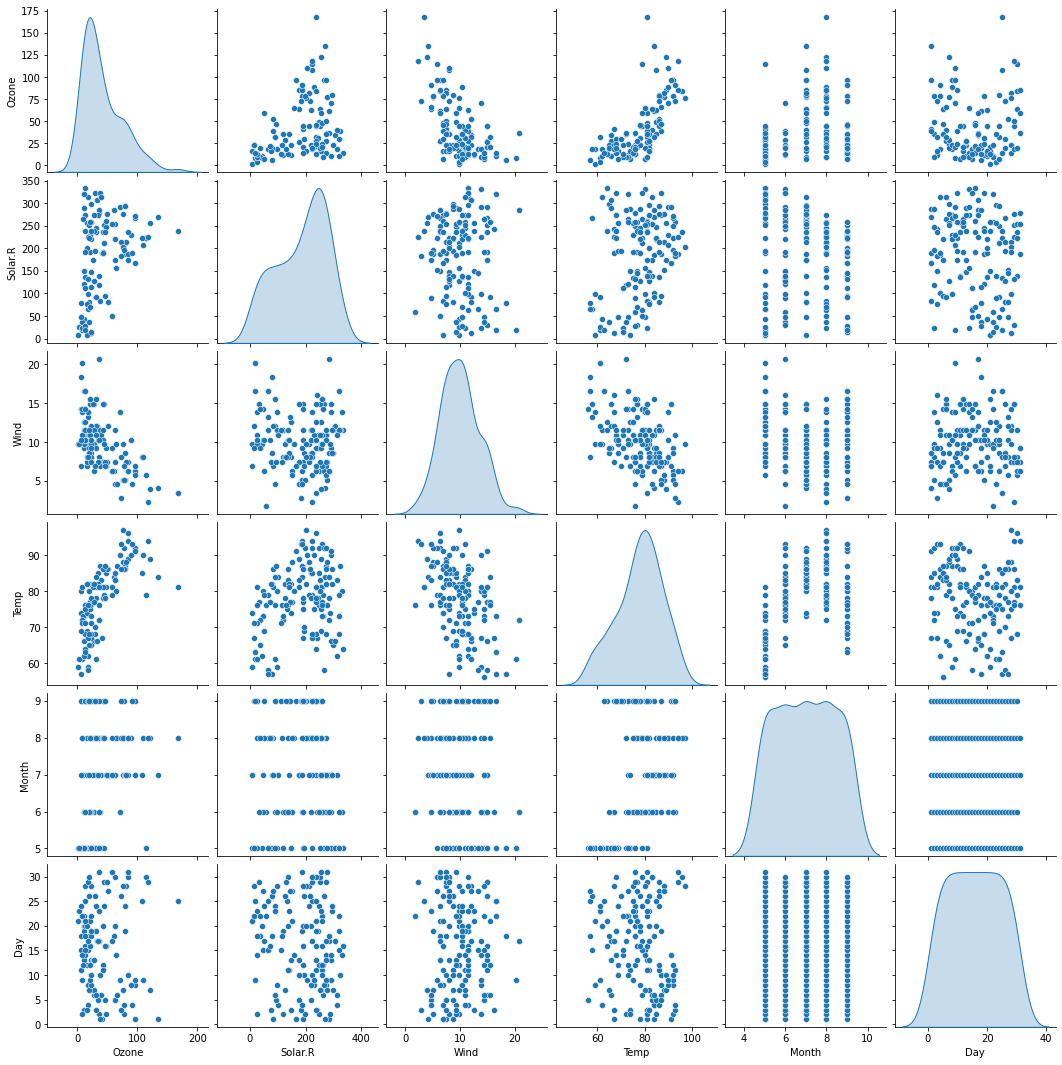

In [6]:
# 데이터 분포
sns.pairplot(data, diag_kind="kde")

In [7]:
#2.결측값 확인 및 제거
data.isnull().any()

Ozone       True
Solar.R     True
Wind       False
Temp       False
Month      False
Day        False
dtype: bool

In [8]:
data = data.dropna()

#111개 행, 6개 열

In [9]:
# 3.Month 원핫인코딩
Month_dummies = data["Month"]

In [10]:
data["May"] = (Month_dummies == 5)*1
data["June"] = (Month_dummies == 6)*1
data["July"] = (Month_dummies == 7)*1
data["August"] = (Month_dummies == 8)*1
data["September"] = (Month_dummies == 9)*1
# data.head() 
# 월 순으로 정렬되어 있음 -> 학습을 진행할 때 데이터를 섞어야 함

In [11]:
#4. 정규화
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day,May,June,July,August,September
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946,0.216216,0.081081,0.234234,0.207207,0.261261
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194,0.413530,0.274198,0.425440,0.407143,0.441314
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data[["Ozone", "Solar.R", "Wind", "Temp"]] = MinMaxScaler().fit_transform(data[["Ozone", "Solar.R", "Wind", "Temp"]])

In [13]:
data.drop(["Day"], axis='columns', inplace=True)
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,May,June,July,August,September
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.246102,0.543736,0.415198,0.519820,7.216216,0.216216,0.081081,0.234234,0.207207,0.261261
std,0.199257,0.278753,0.193354,0.238249,1.473434,0.413530,0.274198,0.425440,0.407143,0.441314
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.325688,0.277174,0.350000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.179641,0.611621,0.402174,0.550000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.365269,0.759939,0.500000,0.687500,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) 데이터 세트 생성

In [14]:
# # 훈련용, 테스트용 데이터 분할
train_dataset = data.sample(frac=0.8, random_state=1) #훈련용 89개
test_dataset = data.drop(train_dataset.index)

In [15]:
# # 라벨 데이터 분할
train_labels = train_dataset.pop("Ozone")
test_labels = test_dataset.pop("Ozone")

## 5) 텐서플로를 활용한 데이터 처리

In [16]:
# tf.feature_column : 데이터의 특징(범주형(원핫인코딩), 수치형 데이터 구분) 처리

CATEGORICAL_COLUMNS = ["May","June", "July", "August", "September"]
NUMERIC_COLUMNS = ["Solar.R", "Wind", "Temp"]

feature_columns_numeric = []
feature_columns_categorical = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = data["Month"].unique()
    feature_columns_categorical.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns_numeric.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [17]:
vocabulary

array([5, 6, 7, 8, 9], dtype=int64)

# 2. 모델링의 이해

## 1) 추상화 라이브러리 - Estimator 사용법

클래스 인스턴스화 -> 데이터를 사용한 모델 학습 -> 학습된 모델 평가 -> 테스트 데이터를 이용한 결과 예측

In [18]:
#1. 입력 함수 작성
def input_fn(features, labels, training=True, batch_size=100):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [19]:
#2. 모델 생성
linearR = tf.estimator.LinearRegressor(
    feature_columns=feature_columns_numeric, model_dir="./Model", label_dimension=1,
    optimizer=lambda: tf.keras.optimizers.SGD(learning_rate=0.01), warm_start_from=None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './Model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
#3. 모델 훈련
linearR.train(input_fn=lambda: input_fn(train_dataset, train_labels), steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./Model\model.ckpt-18000
Instructions for updating:
Use standard file utilities to get m

In [21]:
# for element in input_fn(train_dataset, train_labels).as_numpy_iterator():
#     print(element)

In [22]:
#4. 모델 평가
eval_result = linearR.evaluate(input_fn=lambda: input_fn(test_dataset, test_labels, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T06:10:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./Model\model.ckpt-19000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.68197s
INFO:tensorflow:Finished evaluation at 2020-09-24-06:10:09
INFO:tensorflow:Saving dict for global step 19000: average_loss = 0.028817415, global_s

## 2) 추상화 라이브러리 - 카테고리형 데이터의 추가

In [23]:
#2. 모델 생성
linearR = tf.estimator.LinearRegressor(
    feature_columns=feature_columns_numeric+feature_columns_categorical, model_dir=None, label_dimension=1,
    optimizer=lambda: tf.keras.optimizers.SGD(learning_rate=0.1), warm_start_from=None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpv6drahwa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
#3. 모델 훈련
linearR.train(input_fn=lambda: input_fn(train_dataset, train_labels), steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpv6drahwa\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

In [25]:
#4. 모델 평가
eval_result = linearR.evaluate(input_fn=lambda: input_fn(test_dataset, test_labels, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T06:10:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpv6drahwa\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87318s
INFO:tensorflow:Finished evaluation at 2020-09-24-06:10:19
INFO:tensorflow:Saving dict for global

# 3. 알고리즘의 이해

1) 데이터의 유형

In [26]:
dataB = pd.read_csv("./data/ozone/ozone.csv", sep=",")

In [27]:
dataB.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [28]:
dataB[["Ozone", "Solar.R", "Wind", "Temp"]] = MinMaxScaler().fit_transform(dataB[["Ozone", "Solar.R", "Wind", "Temp"]])

In [29]:
dataB = dataB.dropna()
dataB.drop(["Day"], axis='columns', inplace=True)

In [30]:
Month_dummies = dataB["Month"]
dataB["May"] = (Month_dummies == 5)*1
dataB["June"] = (Month_dummies == 6)*1
dataB["July"] = (Month_dummies == 7)*1
dataB["August"] = (Month_dummies == 8)*1
dataB["September"] = (Month_dummies == 9)*1

In [31]:
dataB.describe()

,Ozone,Solar.R,Wind,Temp,Month,May,June,July,August,September
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.246102,0.543736,0.433665,0.531532,7.216216,0.216216,0.081081,0.234234,0.207207,0.261261
std,0.199257,0.278753,0.187248,0.232438,1.473434,0.413530,0.274198,0.425440,0.407143,0.441314
min,0.000000,0.000000,0.031579,0.024390,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.325688,0.300000,0.365854,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.179641,0.611621,0.421053,0.560976,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.365269,0.759939,0.515789,0.695122,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# label데이터를 평균을 기준으로 0과 1로 구성 #0 -> 평균보다 낮음, #1 -> 평균보다 높음
dataB[["Ozone"]] = binarize(dataB[["Ozone"]], threshold=0.246102)

In [33]:
dataB.tail()

,Ozone,Solar.R,Wind,Temp,Month,May,June,July,August,September
147,0.0,0.039755,0.784211,0.170732,9,0,0,0,0,1
148,0.0,0.568807,0.273684,0.341463,9,0,0,0,0,1
150,0.0,0.562691,0.663158,0.463415,9,0,0,0,0,1
151,0.0,0.379205,0.331579,0.487805,9,0,0,0,0,1
152,0.0,0.660550,0.515789,0.292683,9,0,0,0,0,1


In [71]:
#학습용 데이터 생성
# # 훈련용, 테스트용 데이터 분할
train_datasetB = dataB.sample(frac=0.8, random_state=1) #훈련용 89개
test_datasetB = dataB.drop(train_datasetB.index)
# # 라벨 데이터 분할
train_labelsB = train_datasetB.pop("Ozone")
test_labelsB = test_datasetB.pop("Ozone")

In [72]:
# tf.feature_column : 데이터의 특징(범주형(원핫인코딩), 수치형 데이터 구분) 처리

CATEGORICAL_COLUMNS = ["May","June", "July", "August", "September"]
NUMERIC_COLUMNS = ["Solar.R", "Wind", "Temp"]

feature_column = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dataB["Month"].unique()
    feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_column.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

2) 가정과 비용함수를 바꾼 모델 적용

In [77]:
#2. 모델 생성
linearC = tf.estimator.LinearClassifier(
    feature_columns=feature_column, model_dir=None, n_classes=2,
    optimizer=lambda: tf.keras.optimizers.SGD(learning_rate=0.5))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmp0unf7dr1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [78]:
#3. 모델 훈련
linearC.train(input_fn=lambda: input_fn(train_datasetB, train_labelsB, batch_size=100), steps=100000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp0unf7dr1\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

INFO:tensorflow:global_step/sec: 356.828
INFO:tensorflow:loss = 0.3068289, step = 7100 (0.280 sec)
INFO:tensorflow:global_step/sec: 367.279
INFO:tensorflow:loss = 0.29201746, step = 7200 (0.272 sec)
INFO:tensorflow:global_step/sec: 356.779
INFO:tensorflow:loss = 0.22903122, step = 7300 (0.280 sec)
INFO:tensorflow:global_step/sec: 371.285
INFO:tensorflow:loss = 0.2738274, step = 7400 (0.270 sec)
INFO:tensorflow:global_step/sec: 362.446
INFO:tensorflow:loss = 0.26597503, step = 7500 (0.276 sec)
INFO:tensorflow:global_step/sec: 327.637
INFO:tensorflow:loss = 0.23952788, step = 7600 (0.304 sec)
INFO:tensorflow:global_step/sec: 357.167
INFO:tensorflow:loss = 0.23399381, step = 7700 (0.281 sec)
INFO:tensorflow:global_step/sec: 356.868
INFO:tensorflow:loss = 0.2876642, step = 7800 (0.280 sec)
INFO:tensorflow:global_step/sec: 361.074
INFO:tensorflow:loss = 0.23064612, step = 7900 (0.296 sec)
INFO:tensorflow:global_step/sec: 321.95
INFO:tensorflow:loss = 0.2645682, step = 8000 (0.292 sec)
INFO:

INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.27761695, step = 15300 (0.270 sec)
INFO:tensorflow:global_step/sec: 368.626
INFO:tensorflow:loss = 0.2634678, step = 15400 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.898
INFO:tensorflow:loss = 0.19933061, step = 15500 (0.272 sec)
INFO:tensorflow:global_step/sec: 371.408
INFO:tensorflow:loss = 0.26578408, step = 15600 (0.269 sec)
INFO:tensorflow:global_step/sec: 368.584
INFO:tensorflow:loss = 0.30122006, step = 15700 (0.271 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.24407881, step = 15800 (0.269 sec)
INFO:tensorflow:global_step/sec: 367.32
INFO:tensorflow:loss = 0.20372577, step = 15900 (0.273 sec)
INFO:tensorflow:global_step/sec: 353.058
INFO:tensorflow:loss = 0.21670228, step = 16000 (0.283 sec)
INFO:tensorflow:global_step/sec: 369.988
INFO:tensorflow:loss = 0.23731029, step = 16100 (0.270 sec)
INFO:tensorflow:global_step/sec: 360.472
INFO:tensorflow:loss = 0.3134456, step = 16200 (0.27

INFO:tensorflow:global_step/sec: 367.053
INFO:tensorflow:loss = 0.23884976, step = 23500 (0.273 sec)
INFO:tensorflow:global_step/sec: 366.99
INFO:tensorflow:loss = 0.22382765, step = 23600 (0.271 sec)
INFO:tensorflow:global_step/sec: 368.629
INFO:tensorflow:loss = 0.23444504, step = 23700 (0.271 sec)
INFO:tensorflow:global_step/sec: 372.176
INFO:tensorflow:loss = 0.25214654, step = 23800 (0.269 sec)
INFO:tensorflow:global_step/sec: 363.289
INFO:tensorflow:loss = 0.2524708, step = 23900 (0.276 sec)
INFO:tensorflow:global_step/sec: 359.379
INFO:tensorflow:loss = 0.21105547, step = 24000 (0.278 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.22847693, step = 24100 (0.268 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.22259337, step = 24200 (0.277 sec)
INFO:tensorflow:global_step/sec: 356.822
INFO:tensorflow:loss = 0.2863407, step = 24300 (0.280 sec)
INFO:tensorflow:global_step/sec: 363.247
INFO:tensorflow:loss = 0.23342209, step = 24400 (0.27

INFO:tensorflow:loss = 0.20765443, step = 31600 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.936
INFO:tensorflow:loss = 0.26105368, step = 31700 (0.273 sec)
INFO:tensorflow:global_step/sec: 371.32
INFO:tensorflow:loss = 0.2315611, step = 31800 (0.268 sec)
INFO:tensorflow:global_step/sec: 370.399
INFO:tensorflow:loss = 0.29794738, step = 31900 (0.270 sec)
INFO:tensorflow:global_step/sec: 367.285
INFO:tensorflow:loss = 0.24036181, step = 32000 (0.272 sec)
INFO:tensorflow:global_step/sec: 356.822
INFO:tensorflow:loss = 0.24218278, step = 32100 (0.281 sec)
INFO:tensorflow:global_step/sec: 368.585
INFO:tensorflow:loss = 0.229084, step = 32200 (0.270 sec)
INFO:tensorflow:global_step/sec: 372.755
INFO:tensorflow:loss = 0.23333712, step = 32300 (0.268 sec)
INFO:tensorflow:global_step/sec: 369.759
INFO:tensorflow:loss = 0.2516436, step = 32400 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.921
INFO:tensorflow:loss = 0.24237555, step = 32500 (0.273 sec)
INFO:tensorflow:global_step/sec: 370

INFO:tensorflow:global_step/sec: 337.452
INFO:tensorflow:loss = 0.29603022, step = 39800 (0.297 sec)
INFO:tensorflow:global_step/sec: 343.416
INFO:tensorflow:loss = 0.21981375, step = 39900 (0.291 sec)
INFO:tensorflow:global_step/sec: 363.244
INFO:tensorflow:loss = 0.22993381, step = 40000 (0.274 sec)
INFO:tensorflow:global_step/sec: 353.951
INFO:tensorflow:loss = 0.26412532, step = 40100 (0.283 sec)
INFO:tensorflow:global_step/sec: 365.941
INFO:tensorflow:loss = 0.2764621, step = 40200 (0.274 sec)
INFO:tensorflow:global_step/sec: 369.405
INFO:tensorflow:loss = 0.2592797, step = 40300 (0.270 sec)
INFO:tensorflow:global_step/sec: 371.39
INFO:tensorflow:loss = 0.2544475, step = 40400 (0.269 sec)
INFO:tensorflow:global_step/sec: 371.363
INFO:tensorflow:loss = 0.21154705, step = 40500 (0.269 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.24133196, step = 40600 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.938
INFO:tensorflow:loss = 0.2865957, step = 40700 (0.273 

INFO:tensorflow:loss = 0.26932135, step = 47900 (0.279 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 0.1945702, step = 48000 (0.287 sec)
INFO:tensorflow:global_step/sec: 352.915
INFO:tensorflow:loss = 0.2471085, step = 48100 (0.284 sec)
INFO:tensorflow:global_step/sec: 368.642
INFO:tensorflow:loss = 0.2903475, step = 48200 (0.270 sec)
INFO:tensorflow:global_step/sec: 351.81
INFO:tensorflow:loss = 0.28051645, step = 48300 (0.284 sec)
INFO:tensorflow:global_step/sec: 359.385
INFO:tensorflow:loss = 0.2995805, step = 48400 (0.278 sec)
INFO:tensorflow:global_step/sec: 361.572
INFO:tensorflow:loss = 0.26168337, step = 48500 (0.313 sec)
INFO:tensorflow:global_step/sec: 294.032
INFO:tensorflow:loss = 0.28217515, step = 48600 (0.303 sec)
INFO:tensorflow:global_step/sec: 348.158
INFO:tensorflow:loss = 0.26652154, step = 48700 (0.287 sec)
INFO:tensorflow:global_step/sec: 358.095
INFO:tensorflow:loss = 0.2738538, step = 48800 (0.279 sec)
INFO:tensorflow:global_step/sec: 343.3

INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.23668675, step = 56100 (0.270 sec)
INFO:tensorflow:global_step/sec: 362.724
INFO:tensorflow:loss = 0.269161, step = 56200 (0.277 sec)
INFO:tensorflow:global_step/sec: 359.405
INFO:tensorflow:loss = 0.2483996, step = 56300 (0.277 sec)
INFO:tensorflow:global_step/sec: 361.95
INFO:tensorflow:loss = 0.25054535, step = 56400 (0.277 sec)
INFO:tensorflow:global_step/sec: 325.144
INFO:tensorflow:loss = 0.23900864, step = 56500 (0.308 sec)
INFO:tensorflow:global_step/sec: 349.364
INFO:tensorflow:loss = 0.29325175, step = 56600 (0.286 sec)
INFO:tensorflow:global_step/sec: 335.342
INFO:tensorflow:loss = 0.21991521, step = 56700 (0.299 sec)
INFO:tensorflow:global_step/sec: 359.378
INFO:tensorflow:loss = 0.24264866, step = 56800 (0.276 sec)
INFO:tensorflow:global_step/sec: 356.825
INFO:tensorflow:loss = 0.36352834, step = 56900 (0.280 sec)
INFO:tensorflow:global_step/sec: 364.605
INFO:tensorflow:loss = 0.24651021, step = 57000 (0.274

INFO:tensorflow:loss = 0.23626319, step = 64200 (0.276 sec)
INFO:tensorflow:global_step/sec: 367.284
INFO:tensorflow:loss = 0.30110636, step = 64300 (0.271 sec)
INFO:tensorflow:global_step/sec: 361.973
INFO:tensorflow:loss = 0.237037, step = 64400 (0.277 sec)
INFO:tensorflow:global_step/sec: 367.286
INFO:tensorflow:loss = 0.24813648, step = 64500 (0.272 sec)
INFO:tensorflow:global_step/sec: 366.474
INFO:tensorflow:loss = 0.32682377, step = 64600 (0.273 sec)
INFO:tensorflow:global_step/sec: 366.044
INFO:tensorflow:loss = 0.2494741, step = 64700 (0.273 sec)
INFO:tensorflow:global_step/sec: 367.233
INFO:tensorflow:loss = 0.2339882, step = 64800 (0.271 sec)
INFO:tensorflow:global_step/sec: 353.098
INFO:tensorflow:loss = 0.30184326, step = 64900 (0.284 sec)
INFO:tensorflow:global_step/sec: 353.324
INFO:tensorflow:loss = 0.22821325, step = 65000 (0.282 sec)
INFO:tensorflow:global_step/sec: 353.051
INFO:tensorflow:loss = 0.27070773, step = 65100 (0.283 sec)
INFO:tensorflow:global_step/sec: 36

INFO:tensorflow:global_step/sec: 355.561
INFO:tensorflow:loss = 0.27909288, step = 72400 (0.281 sec)
INFO:tensorflow:global_step/sec: 352.889
INFO:tensorflow:loss = 0.24949482, step = 72500 (0.283 sec)
INFO:tensorflow:global_step/sec: 355.521
INFO:tensorflow:loss = 0.2500999, step = 72600 (0.280 sec)
INFO:tensorflow:global_step/sec: 358.09
INFO:tensorflow:loss = 0.23457001, step = 72700 (0.279 sec)
INFO:tensorflow:global_step/sec: 349.13
INFO:tensorflow:loss = 0.21523967, step = 72800 (0.286 sec)
INFO:tensorflow:global_step/sec: 352.311
INFO:tensorflow:loss = 0.28744525, step = 72900 (0.285 sec)
INFO:tensorflow:global_step/sec: 364.609
INFO:tensorflow:loss = 0.25639915, step = 73000 (0.273 sec)
INFO:tensorflow:global_step/sec: 355.515
INFO:tensorflow:loss = 0.22085592, step = 73100 (0.282 sec)
INFO:tensorflow:global_step/sec: 345.792
INFO:tensorflow:loss = 0.25824702, step = 73200 (0.289 sec)
INFO:tensorflow:global_step/sec: 353.575
INFO:tensorflow:loss = 0.2894513, step = 73300 (0.282

INFO:tensorflow:global_step/sec: 355.522
INFO:tensorflow:loss = 0.23385793, step = 80600 (0.280 sec)
INFO:tensorflow:global_step/sec: 355.6
INFO:tensorflow:loss = 0.22797613, step = 80700 (0.282 sec)
INFO:tensorflow:global_step/sec: 354.303
INFO:tensorflow:loss = 0.2881633, step = 80800 (0.282 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.26105788, step = 80900 (0.269 sec)
INFO:tensorflow:global_step/sec: 370.752
INFO:tensorflow:loss = 0.21845435, step = 81000 (0.269 sec)
INFO:tensorflow:global_step/sec: 360.717
INFO:tensorflow:loss = 0.1977748, step = 81100 (0.277 sec)
INFO:tensorflow:global_step/sec: 355.553
INFO:tensorflow:loss = 0.2388063, step = 81200 (0.282 sec)
INFO:tensorflow:global_step/sec: 355.563
INFO:tensorflow:loss = 0.2933108, step = 81300 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.051
INFO:tensorflow:loss = 0.2947035, step = 81400 (0.282 sec)
INFO:tensorflow:global_step/sec: 353.768
INFO:tensorflow:loss = 0.25513366, step = 81500 (0.284 se

INFO:tensorflow:global_step/sec: 361.551
INFO:tensorflow:loss = 0.2744165, step = 88800 (0.277 sec)
INFO:tensorflow:global_step/sec: 354.299
INFO:tensorflow:loss = 0.20714152, step = 88900 (0.282 sec)
INFO:tensorflow:global_step/sec: 346.949
INFO:tensorflow:loss = 0.23806772, step = 89000 (0.289 sec)
INFO:tensorflow:global_step/sec: 342.206
INFO:tensorflow:loss = 0.27486223, step = 89100 (0.291 sec)
INFO:tensorflow:global_step/sec: 351.088
INFO:tensorflow:loss = 0.23736744, step = 89200 (0.285 sec)
INFO:tensorflow:global_step/sec: 345.748
INFO:tensorflow:loss = 0.23165745, step = 89300 (0.289 sec)
INFO:tensorflow:global_step/sec: 344.523
INFO:tensorflow:loss = 0.19173267, step = 89400 (0.291 sec)
INFO:tensorflow:global_step/sec: 351.858
INFO:tensorflow:loss = 0.24354081, step = 89500 (0.283 sec)
INFO:tensorflow:global_step/sec: 360.627
INFO:tensorflow:loss = 0.27360898, step = 89600 (0.276 sec)
INFO:tensorflow:global_step/sec: 365.521
INFO:tensorflow:loss = 0.29278377, step = 89700 (0.

INFO:tensorflow:loss = 0.2454518, step = 96900 (0.278 sec)
INFO:tensorflow:global_step/sec: 371.355
INFO:tensorflow:loss = 0.24185723, step = 97000 (0.268 sec)
INFO:tensorflow:global_step/sec: 351.812
INFO:tensorflow:loss = 0.22349867, step = 97100 (0.284 sec)
INFO:tensorflow:global_step/sec: 358.101
INFO:tensorflow:loss = 0.25610375, step = 97200 (0.280 sec)
INFO:tensorflow:global_step/sec: 353.055
INFO:tensorflow:loss = 0.2375529, step = 97300 (0.282 sec)
INFO:tensorflow:global_step/sec: 354.989
INFO:tensorflow:loss = 0.20275074, step = 97400 (0.282 sec)
INFO:tensorflow:global_step/sec: 353.056
INFO:tensorflow:loss = 0.2997023, step = 97500 (0.283 sec)
INFO:tensorflow:global_step/sec: 369.943
INFO:tensorflow:loss = 0.24645227, step = 97600 (0.270 sec)
INFO:tensorflow:global_step/sec: 360.666
INFO:tensorflow:loss = 0.25733972, step = 97700 (0.277 sec)
INFO:tensorflow:global_step/sec: 364.243
INFO:tensorflow:loss = 0.28354478, step = 97800 (0.276 sec)
INFO:tensorflow:global_step/sec: 3

In [79]:
#4. 모델 평가
eval_result = linearC.evaluate(input_fn=lambda: input_fn(test_datasetB, test_labelsB, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T06:47:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp0unf7dr1\model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.37238s
INFO:tensorflow:Finished evaluation at 2020-09-24-06:47:26
INFO:tensorflow:Saving dict for glob

In [80]:
#2-2. 함수를 조절한 모델 생성 
linearC = tf.estimator.LinearClassifier(
    feature_columns=feature_column, model_dir=None, n_classes=2,
    optimizer=lambda: tf.keras.optimizers.Adam(learning_rate=0.5))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpt66mmxkx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [81]:
#3-2. 새 모델 훈련00
linearC.train(input_fn=lambda: input_fn(train_datasetB, train_labelsB, batch_size=100), steps=100000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpt66mmxkx\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

INFO:tensorflow:global_step/sec: 329.859
INFO:tensorflow:loss = 0.25870866, step = 7100 (0.304 sec)
INFO:tensorflow:global_step/sec: 330.914
INFO:tensorflow:loss = 0.28045222, step = 7200 (0.301 sec)
INFO:tensorflow:global_step/sec: 326.601
INFO:tensorflow:loss = 0.29539672, step = 7300 (0.306 sec)
INFO:tensorflow:global_step/sec: 330.915
INFO:tensorflow:loss = 0.2153172, step = 7400 (0.302 sec)
INFO:tensorflow:global_step/sec: 324.42
INFO:tensorflow:loss = 0.25328967, step = 7500 (0.308 sec)
INFO:tensorflow:global_step/sec: 332.024
INFO:tensorflow:loss = 0.29500762, step = 7600 (0.301 sec)
INFO:tensorflow:global_step/sec: 328.767
INFO:tensorflow:loss = 0.28825054, step = 7700 (0.304 sec)
INFO:tensorflow:global_step/sec: 333.111
INFO:tensorflow:loss = 0.24620876, step = 7800 (0.300 sec)
INFO:tensorflow:global_step/sec: 319.227
INFO:tensorflow:loss = 0.2458437, step = 7900 (0.313 sec)
INFO:tensorflow:global_step/sec: 326.577
INFO:tensorflow:loss = 0.23479597, step = 8000 (0.306 sec)
INF

INFO:tensorflow:global_step/sec: 330.915
INFO:tensorflow:loss = 0.2430659, step = 15300 (0.302 sec)
INFO:tensorflow:global_step/sec: 328.13
INFO:tensorflow:loss = 0.28757778, step = 15400 (0.305 sec)
INFO:tensorflow:global_step/sec: 314.34
INFO:tensorflow:loss = 0.23526183, step = 15500 (0.318 sec)
INFO:tensorflow:global_step/sec: 330.914
INFO:tensorflow:loss = 0.29743972, step = 15600 (0.303 sec)
INFO:tensorflow:global_step/sec: 326.602
INFO:tensorflow:loss = 0.28446424, step = 15700 (0.305 sec)
INFO:tensorflow:global_step/sec: 329.592
INFO:tensorflow:loss = 0.23126663, step = 15800 (0.303 sec)
INFO:tensorflow:global_step/sec: 309.468
INFO:tensorflow:loss = 0.2273945, step = 15900 (0.323 sec)
INFO:tensorflow:global_step/sec: 322.37
INFO:tensorflow:loss = 0.27108228, step = 16000 (0.310 sec)
INFO:tensorflow:global_step/sec: 309.725
INFO:tensorflow:loss = 0.23575, step = 16100 (0.323 sec)
INFO:tensorflow:global_step/sec: 320.339
INFO:tensorflow:loss = 0.3093458, step = 16200 (0.322 sec)

INFO:tensorflow:loss = 0.25193682, step = 23400 (0.337 sec)
INFO:tensorflow:global_step/sec: 309.468
INFO:tensorflow:loss = 0.2775498, step = 23500 (0.323 sec)
INFO:tensorflow:global_step/sec: 323.945
INFO:tensorflow:loss = 0.26507708, step = 23600 (0.309 sec)
INFO:tensorflow:global_step/sec: 312.362
INFO:tensorflow:loss = 0.20230402, step = 23700 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.334
INFO:tensorflow:loss = 0.24933337, step = 23800 (0.318 sec)
INFO:tensorflow:global_step/sec: 319.322
INFO:tensorflow:loss = 0.2502895, step = 23900 (0.313 sec)
INFO:tensorflow:global_step/sec: 329.791
INFO:tensorflow:loss = 0.29029876, step = 24000 (0.303 sec)
INFO:tensorflow:global_step/sec: 328.191
INFO:tensorflow:loss = 0.2361062, step = 24100 (0.305 sec)
INFO:tensorflow:global_step/sec: 313.344
INFO:tensorflow:loss = 0.27196226, step = 24200 (0.319 sec)
INFO:tensorflow:global_step/sec: 329.846
INFO:tensorflow:loss = 0.313134, step = 24300 (0.303 sec)
INFO:tensorflow:global_step/sec: 327

INFO:tensorflow:global_step/sec: 278.521
INFO:tensorflow:loss = 0.23131403, step = 31600 (0.325 sec)
INFO:tensorflow:global_step/sec: 323.477
INFO:tensorflow:loss = 0.2631335, step = 31700 (0.309 sec)
INFO:tensorflow:global_step/sec: 321.372
INFO:tensorflow:loss = 0.25809795, step = 31800 (0.312 sec)
INFO:tensorflow:global_step/sec: 332.011
INFO:tensorflow:loss = 0.31560537, step = 31900 (0.301 sec)
INFO:tensorflow:global_step/sec: 324.448
INFO:tensorflow:loss = 0.23594148, step = 32000 (0.308 sec)
INFO:tensorflow:global_step/sec: 319.362
INFO:tensorflow:loss = 0.22961539, step = 32100 (0.312 sec)
INFO:tensorflow:global_step/sec: 326.603
INFO:tensorflow:loss = 0.29571292, step = 32200 (0.306 sec)
INFO:tensorflow:global_step/sec: 330.914
INFO:tensorflow:loss = 0.2674213, step = 32300 (0.302 sec)
INFO:tensorflow:global_step/sec: 297.532
INFO:tensorflow:loss = 0.24222489, step = 32400 (0.337 sec)
INFO:tensorflow:global_step/sec: 309.468
INFO:tensorflow:loss = 0.2618611, step = 32500 (0.32

INFO:tensorflow:loss = 0.25144446, step = 39700 (0.304 sec)
INFO:tensorflow:global_step/sec: 313.302
INFO:tensorflow:loss = 0.24433829, step = 39800 (0.318 sec)
INFO:tensorflow:global_step/sec: 278.925
INFO:tensorflow:loss = 0.2583248, step = 39900 (0.359 sec)
INFO:tensorflow:global_step/sec: 312.355
INFO:tensorflow:loss = 0.24116893, step = 40000 (0.320 sec)
INFO:tensorflow:global_step/sec: 321.372
INFO:tensorflow:loss = 0.28887665, step = 40100 (0.311 sec)
INFO:tensorflow:global_step/sec: 320.968
INFO:tensorflow:loss = 0.15612595, step = 40200 (0.312 sec)
INFO:tensorflow:global_step/sec: 320.349
INFO:tensorflow:loss = 0.24658754, step = 40300 (0.312 sec)
INFO:tensorflow:global_step/sec: 316.297
INFO:tensorflow:loss = 0.2095452, step = 40400 (0.316 sec)
INFO:tensorflow:global_step/sec: 301.103
INFO:tensorflow:loss = 0.23898596, step = 40500 (0.332 sec)
INFO:tensorflow:global_step/sec: 316.778
INFO:tensorflow:loss = 0.23842612, step = 40600 (0.316 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 332.013
INFO:tensorflow:loss = 0.2712947, step = 47900 (0.300 sec)
INFO:tensorflow:global_step/sec: 322.024
INFO:tensorflow:loss = 0.25927553, step = 48000 (0.310 sec)
INFO:tensorflow:global_step/sec: 309.505
INFO:tensorflow:loss = 0.27982488, step = 48100 (0.323 sec)
INFO:tensorflow:global_step/sec: 325.539
INFO:tensorflow:loss = 0.25005844, step = 48200 (0.307 sec)
INFO:tensorflow:global_step/sec: 317.305
INFO:tensorflow:loss = 0.2504617, step = 48300 (0.316 sec)
INFO:tensorflow:global_step/sec: 328.599
INFO:tensorflow:loss = 0.23659918, step = 48400 (0.303 sec)
INFO:tensorflow:global_step/sec: 333.156
INFO:tensorflow:loss = 0.22949606, step = 48500 (0.301 sec)
INFO:tensorflow:global_step/sec: 305.653
INFO:tensorflow:loss = 0.23951986, step = 48600 (0.326 sec)
INFO:tensorflow:global_step/sec: 316.302
INFO:tensorflow:loss = 0.2715758, step = 48700 (0.316 sec)
INFO:tensorflow:global_step/sec: 327.248
INFO:tensorflow:loss = 0.24352102, step = 48800 (0.32

INFO:tensorflow:loss = 0.2243157, step = 56000 (0.318 sec)
INFO:tensorflow:global_step/sec: 325.542
INFO:tensorflow:loss = 0.2581091, step = 56100 (0.306 sec)
INFO:tensorflow:global_step/sec: 329.478
INFO:tensorflow:loss = 0.2798344, step = 56200 (0.304 sec)
INFO:tensorflow:global_step/sec: 332.011
INFO:tensorflow:loss = 0.23013389, step = 56300 (0.301 sec)
INFO:tensorflow:global_step/sec: 335.34
INFO:tensorflow:loss = 0.22602767, step = 56400 (0.299 sec)
INFO:tensorflow:global_step/sec: 328.747
INFO:tensorflow:loss = 0.2878037, step = 56500 (0.303 sec)
INFO:tensorflow:global_step/sec: 314.063
INFO:tensorflow:loss = 0.3170057, step = 56600 (0.318 sec)
INFO:tensorflow:global_step/sec: 318.307
INFO:tensorflow:loss = 0.2521554, step = 56700 (0.314 sec)
INFO:tensorflow:global_step/sec: 321.369
INFO:tensorflow:loss = 0.27784854, step = 56800 (0.311 sec)
INFO:tensorflow:global_step/sec: 327.651
INFO:tensorflow:loss = 0.27425757, step = 56900 (0.306 sec)
INFO:tensorflow:global_step/sec: 326.6

INFO:tensorflow:global_step/sec: 281.652
INFO:tensorflow:loss = 0.24709979, step = 64200 (0.314 sec)
INFO:tensorflow:global_step/sec: 323.41
INFO:tensorflow:loss = 0.24812265, step = 64300 (0.308 sec)
INFO:tensorflow:global_step/sec: 316.33
INFO:tensorflow:loss = 0.23039232, step = 64400 (0.317 sec)
INFO:tensorflow:global_step/sec: 320.344
INFO:tensorflow:loss = 0.22965139, step = 64500 (0.311 sec)
INFO:tensorflow:global_step/sec: 316.301
INFO:tensorflow:loss = 0.21675575, step = 64600 (0.316 sec)
INFO:tensorflow:global_step/sec: 318.307
INFO:tensorflow:loss = 0.23104614, step = 64700 (0.315 sec)
INFO:tensorflow:global_step/sec: 324.458
INFO:tensorflow:loss = 0.2427854, step = 64800 (0.307 sec)
INFO:tensorflow:global_step/sec: 308.513
INFO:tensorflow:loss = 0.24540858, step = 64900 (0.324 sec)
INFO:tensorflow:global_step/sec: 331.447
INFO:tensorflow:loss = 0.3043001, step = 65000 (0.302 sec)
INFO:tensorflow:global_step/sec: 334.252
INFO:tensorflow:loss = 0.22452743, step = 65100 (0.299

INFO:tensorflow:global_step/sec: 328.745
INFO:tensorflow:loss = 0.24234056, step = 72400 (0.338 sec)
INFO:tensorflow:global_step/sec: 278.521
INFO:tensorflow:loss = 0.29858464, step = 72500 (0.326 sec)
INFO:tensorflow:global_step/sec: 320.343
INFO:tensorflow:loss = 0.23649584, step = 72600 (0.311 sec)
INFO:tensorflow:global_step/sec: 321.372
INFO:tensorflow:loss = 0.23890562, step = 72700 (0.312 sec)
INFO:tensorflow:global_step/sec: 309.434
INFO:tensorflow:loss = 0.2843022, step = 72800 (0.322 sec)
INFO:tensorflow:global_step/sec: 320.289
INFO:tensorflow:loss = 0.29136306, step = 72900 (0.313 sec)
INFO:tensorflow:global_step/sec: 304.796
INFO:tensorflow:loss = 0.33941308, step = 73000 (0.328 sec)
INFO:tensorflow:global_step/sec: 324.953
INFO:tensorflow:loss = 0.28608945, step = 73100 (0.307 sec)
INFO:tensorflow:global_step/sec: 330.913
INFO:tensorflow:loss = 0.28306764, step = 73200 (0.303 sec)
INFO:tensorflow:global_step/sec: 327.585
INFO:tensorflow:loss = 0.23635747, step = 73300 (0.

INFO:tensorflow:global_step/sec: 335.306
INFO:tensorflow:loss = 0.25067946, step = 80600 (0.297 sec)
INFO:tensorflow:global_step/sec: 322.439
INFO:tensorflow:loss = 0.2829592, step = 80700 (0.311 sec)
INFO:tensorflow:global_step/sec: 322.403
INFO:tensorflow:loss = 0.2055025, step = 80800 (0.309 sec)
INFO:tensorflow:global_step/sec: 329.826
INFO:tensorflow:loss = 0.25600344, step = 80900 (0.303 sec)
INFO:tensorflow:global_step/sec: 328.744
INFO:tensorflow:loss = 0.2338924, step = 81000 (0.305 sec)
INFO:tensorflow:global_step/sec: 325.51
INFO:tensorflow:loss = 0.23753397, step = 81100 (0.306 sec)
INFO:tensorflow:global_step/sec: 321.369
INFO:tensorflow:loss = 0.24657564, step = 81200 (0.311 sec)
INFO:tensorflow:global_step/sec: 333.154
INFO:tensorflow:loss = 0.27761576, step = 81300 (0.300 sec)
INFO:tensorflow:global_step/sec: 326.565
INFO:tensorflow:loss = 0.2533225, step = 81400 (0.306 sec)
INFO:tensorflow:global_step/sec: 330.953
INFO:tensorflow:loss = 0.23335901, step = 81500 (0.303 

INFO:tensorflow:global_step/sec: 327.677
INFO:tensorflow:loss = 0.24034645, step = 88800 (0.306 sec)
INFO:tensorflow:global_step/sec: 328.745
INFO:tensorflow:loss = 0.26656693, step = 88900 (0.303 sec)
INFO:tensorflow:global_step/sec: 314.287
INFO:tensorflow:loss = 0.25339308, step = 89000 (0.318 sec)
INFO:tensorflow:global_step/sec: 322.394
INFO:tensorflow:loss = 0.24453245, step = 89100 (0.310 sec)
INFO:tensorflow:global_step/sec: 327.672
INFO:tensorflow:loss = 0.26147008, step = 89200 (0.306 sec)
INFO:tensorflow:global_step/sec: 316.973
INFO:tensorflow:loss = 0.2348728, step = 89300 (0.314 sec)
INFO:tensorflow:global_step/sec: 310.425
INFO:tensorflow:loss = 0.23706362, step = 89400 (0.323 sec)
INFO:tensorflow:global_step/sec: 323.107
INFO:tensorflow:loss = 0.2499213, step = 89500 (0.309 sec)
INFO:tensorflow:global_step/sec: 328.778
INFO:tensorflow:loss = 0.2749627, step = 89600 (0.303 sec)
INFO:tensorflow:global_step/sec: 341.007
INFO:tensorflow:loss = 0.25042784, step = 89700 (0.29

INFO:tensorflow:global_step/sec: 326.638
INFO:tensorflow:loss = 0.21069849, step = 97000 (0.306 sec)
INFO:tensorflow:global_step/sec: 312.33
INFO:tensorflow:loss = 0.25062978, step = 97100 (0.320 sec)
INFO:tensorflow:global_step/sec: 328.778
INFO:tensorflow:loss = 0.3491786, step = 97200 (0.305 sec)
INFO:tensorflow:global_step/sec: 335.342
INFO:tensorflow:loss = 0.257581, step = 97300 (0.298 sec)
INFO:tensorflow:global_step/sec: 303.361
INFO:tensorflow:loss = 0.23954229, step = 97400 (0.330 sec)
INFO:tensorflow:global_step/sec: 322.944
INFO:tensorflow:loss = 0.3029167, step = 97500 (0.309 sec)
INFO:tensorflow:global_step/sec: 326.606
INFO:tensorflow:loss = 0.2597529, step = 97600 (0.306 sec)
INFO:tensorflow:global_step/sec: 326.603
INFO:tensorflow:loss = 0.22159466, step = 97700 (0.306 sec)
INFO:tensorflow:global_step/sec: 315.755
INFO:tensorflow:loss = 0.32196927, step = 97800 (0.318 sec)
INFO:tensorflow:global_step/sec: 319.323
INFO:tensorflow:loss = 0.27148584, step = 97900 (0.312 s

In [41]:
#4-2. 새 모델 평가
eval_result = linearC.evaluate(input_fn=lambda: input_fn(test_datasetB, test_labelsB, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T06:10:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp1rbphx7f\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.32463s
INFO:tensorflow:Finished evaluation at 2020-09-24-06:10:41
INFO:tensorflow:Saving dict for global

# 4. 모델 평가 및 딥러닝의 이해

1) 데이터의 이해2

In [42]:
dataC = pd.read_csv("./data/ozone/ozone.csv", sep=",")

In [43]:
dataC[["Ozone", "Solar.R", "Wind", "Temp"]] = MinMaxScaler().fit_transform(dataC[["Ozone", "Solar.R", "Wind", "Temp"]])

In [44]:
dataC = dataC.dropna()
dataC.drop(["Day"], axis='columns', inplace=True)

In [45]:
Month_dummies = dataC["Month"]
dataC["May"] = (Month_dummies == 5)*1
dataC["June"] = (Month_dummies == 6)*1
dataC["July"] = (Month_dummies == 7)*1
dataC["August"] = (Month_dummies == 8)*1
dataC["September"] = (Month_dummies == 9)*1

In [46]:
dataC.describe()

,Ozone,Solar.R,Wind,Temp,Month,May,June,July,August,September
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.246102,0.543736,0.433665,0.531532,7.216216,0.216216,0.081081,0.234234,0.207207,0.261261
std,0.199257,0.278753,0.187248,0.232438,1.473434,0.413530,0.274198,0.425440,0.407143,0.441314
min,0.000000,0.000000,0.031579,0.024390,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.325688,0.300000,0.365854,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.179641,0.611621,0.421053,0.560976,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.365269,0.759939,0.515789,0.695122,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# label데이터를 값을 네 구간으로 나누어 재구성 (기준 25%, 50%, 75%)
bins = [0, 0.101796, 0.179641, 0.365269, np.inf]
names = [0, 1, 2, 3]
d = dict(enumerate(names, 1))
dataC["OzoneRange"] = pd.cut(dataC["Ozone"], bins, labels=names)
dataC = dataC.dropna()
dataC["OzoneRange"].astype("int")

0      2
1      2
2      0
3      1
6      1
      ..
147    0
148    1
150    0
151    1
152    1
Name: OzoneRange, Length: 110, dtype: int32

In [48]:
print(d)

{1: 0, 2: 1, 3: 2, 4: 3}


In [49]:
# 데이터셋 나누기
#학습용 데이터 생성
# # 훈련용, 테스트용 데이터 분할
train_datasetC = dataC.sample(frac=0.8, random_state=1)
test_datasetC = dataC.drop(train_datasetC.index)

##라벨 데이터 분할
train_labelsC = train_datasetC.pop("OzoneRange")
test_labelsC = test_datasetC.pop("OzoneRange")

In [50]:
CATEGORICAL_COLUMNS = ["May","June", "July", "August", "September"]
NUMERIC_COLUMNS = ["Wind", "Temp"]

feature_column = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dataC["Month"].unique()
    feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_column.append(tf.feature_column.numeric_column(feature_name, dtype=tf.int64))

In [51]:
#2. 모델 생성

model_dir = tempfile.mkdtemp()
starter_learning_rate = 0.1
end_learning_rate = 0.05
decay_steps = 1000
learning_rate_fn=tf.keras.optimizers.schedules.PolynomialDecay(
        starter_learning_rate,
        decay_steps, 
        end_learning_rate,
        power=0.8)

Multi_linearC = tf.estimator.LinearClassifier(
    feature_columns=feature_column, model_dir=None, n_classes=4,
    optimizer=lambda: tf.keras.optimizers.SGD(
        learning_rate=learning_rate_fn))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpmglv1da2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
#3. 모델 훈련
Multi_linearC.train(input_fn=lambda: input_fn(train_datasetC, train_labelsC, batch_size=1000), steps=10000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpmglv1da2\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

INFO:tensorflow:loss = 0.92005044, step = 7100 (1.064 sec)
INFO:tensorflow:global_step/sec: 94.8475
INFO:tensorflow:loss = 0.9191085, step = 7200 (1.053 sec)
INFO:tensorflow:global_step/sec: 96.1341
INFO:tensorflow:loss = 0.9168799, step = 7300 (1.040 sec)
INFO:tensorflow:global_step/sec: 94.0632
INFO:tensorflow:loss = 0.9194938, step = 7400 (1.064 sec)
INFO:tensorflow:global_step/sec: 96.3557
INFO:tensorflow:loss = 0.91867465, step = 7500 (1.038 sec)
INFO:tensorflow:global_step/sec: 95.7579
INFO:tensorflow:loss = 0.9190753, step = 7600 (1.044 sec)
INFO:tensorflow:global_step/sec: 94.4991
INFO:tensorflow:loss = 0.91689974, step = 7700 (1.058 sec)
INFO:tensorflow:global_step/sec: 94.8654
INFO:tensorflow:loss = 0.9161208, step = 7800 (1.054 sec)
INFO:tensorflow:global_step/sec: 95.716
INFO:tensorflow:loss = 0.9171594, step = 7900 (1.045 sec)
INFO:tensorflow:global_step/sec: 93.6625
INFO:tensorflow:loss = 0.9167013, step = 8000 (1.068 sec)
INFO:tensorflow:global_step/sec: 95.0242
INFO:ten

In [53]:
#4. 모델 평가
eval_result = Multi_linearC.evaluate(input_fn=lambda: input_fn(test_datasetC, test_labelsC, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T06:12:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpmglv1da2\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.84277s
INFO:tensorflow:Finished evaluation at 2020-09-24-06:12:33
INFO:tensorflow:Saving dict for globa

2) 딥러닝 모델 적용 기본

In [54]:
dataD = pd.read_csv("./data/ozone/ozone.csv", sep=",")

In [55]:
dataD = dataD.dropna()
dataD.drop(["Day"], axis='columns', inplace=True)

In [56]:
dataD[["Ozone", "Solar.R", "Wind", "Temp"]] = MinMaxScaler().fit_transform(dataD[["Ozone", "Solar.R", "Wind", "Temp"]])

In [57]:
Month_dummies = dataD["Month"]
dataD["May"] = (Month_dummies == 5)*1
dataD["June"] = (Month_dummies == 6)*1
dataD["July"] = (Month_dummies == 7)*1
dataD["August"] = (Month_dummies == 8)*1
dataD["September"] = (Month_dummies == 9)*1

In [58]:
dataD.describe()

,Ozone,Solar.R,Wind,Temp,Month,May,June,July,August,September
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.246102,0.543736,0.415198,0.519820,7.216216,0.216216,0.081081,0.234234,0.207207,0.261261
std,0.199257,0.278753,0.193354,0.238249,1.473434,0.413530,0.274198,0.425440,0.407143,0.441314
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.325688,0.277174,0.350000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.179641,0.611621,0.402174,0.550000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.365269,0.759939,0.500000,0.687500,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# label데이터를 값을 네 구간으로 나누어 재구성 (기준 25%, 50%, 75%)
bins = [0, 0.101796, 0.179641, 0.365269, np.inf]
names = [0, 1, 2, 3]
d = dict(enumerate(names, 1))
dataD["OzoneRange"] = pd.cut(dataD["Ozone"], bins, labels=names)
dataD = dataD.dropna()
dataD["OzoneRange"].astype("int")

0      2
1      2
2      0
3      1
6      1
      ..
147    0
148    1
150    0
151    1
152    1
Name: OzoneRange, Length: 110, dtype: int32

In [60]:
# 데이터셋 나누기
#학습용 데이터 생성
# # 훈련용, 테스트용 데이터 분할
train_datasetD = dataD.sample(frac=0.8, random_state=1)
test_datasetD = dataD.drop(train_datasetC.index)

##라벨 데이터 분할
train_labelsD = train_datasetD.pop("OzoneRange")
test_labelsD = test_datasetD.pop("OzoneRange")

In [85]:
# CATEGORICAL_COLUMNS = ["May","June", "July", "August", "September"]
NUMERIC_COLUMNS = ["Wind", "Temp"]

feature_column_CNN= []
# for feature_name in CATEGORICAL_COLUMNS:
#   vocabulary = dataB["Month"].unique()
#   feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_column_CNN.append(tf.feature_column.numeric_column(feature_name, dtype=tf.int64))

In [86]:
#2. 모델 생성

model_dir = tempfile.mkdtemp()
starter_learning_rate = 0.5
end_learning_rate = 0.01
decay_steps = 100
learning_rate_fn=tf.keras.optimizers.schedules.PolynomialDecay(
        starter_learning_rate,
        decay_steps, 
        end_learning_rate,
        power=0.8)

DNNC = tf.estimator.DNNClassifier(hidden_units=[2, 5, 3],
                                  feature_columns=feature_column_CNN, model_dir=None, 
                                  n_classes=4,
                                  optimizer=lambda: tf.keras.optimizers.SGD(learning_rate=learning_rate_fn),
                                  activation_fn=tf.nn.relu,
                                  dropout = 0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmp1ko9ql_2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [87]:
#3. 모델 훈련
DNNC.train(input_fn=lambda: input_fn(train_datasetD, train_labelsD, batch_size=1000), steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp1ko9ql_2\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

In [88]:
#4. 모델 평가
eval_result = Multi_linearC.evaluate(input_fn=lambda: input_fn(test_datasetD, test_labelsD, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T07:38:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpmglv1da2\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.85175s
INFO:tensorflow:Finished evaluation at 2020-09-24-07:38:38
INFO:tensorflow:Saving dict for globa

3) 카테고리화 데이터 딥러닝에 적용하기

In [93]:
CATEGORICAL_COLUMNS = ["May","June", "July", "August", "September"]
NUMERIC_COLUMNS = ["Wind", "Temp"]

feature_column_CNN= []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dataD["Month"].unique()
    categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
    embedding_columns = tf.feature_column.embedding_column(categorical_column=categorical_column,dimension=5)
    feature_column_CNN.append(embedding_columns)

for feature_name in NUMERIC_COLUMNS:
    feature_column_CNN.append(tf.feature_column.numeric_column(feature_name, dtype=tf.int64))

In [106]:
#2. 모델 생성

model_dir = tempfile.mkdtemp()
starter_learning_rate = 0.5
end_learning_rate = 0.01
decay_steps = 100
learning_rate_fn=tf.keras.optimizers.schedules.PolynomialDecay(
        starter_learning_rate,
        decay_steps, 
        end_learning_rate,
        power=0.8)

DNNC = tf.estimator.DNNClassifier(hidden_units=[7, 5, 3],
                                  feature_columns=feature_column_CNN, model_dir=None, 
                                  n_classes=4,
                                  optimizer=lambda: tf.keras.optimizers.SGD(learning_rate=learning_rate_fn),
                                  activation_fn=tf.nn.sigmoid,
                                  dropout = 0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmp94mhw90c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [107]:
#3. 모델 훈련
DNNC.train(input_fn=lambda: input_fn(train_datasetD, train_labelsD, batch_size=100), steps=10000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp94mhw90c\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:t

INFO:tensorflow:loss = 1.374008, step = 7100 (0.332 sec)
INFO:tensorflow:global_step/sec: 312.389
INFO:tensorflow:loss = 1.3792344, step = 7200 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.806
INFO:tensorflow:loss = 1.3858622, step = 7300 (0.324 sec)
INFO:tensorflow:global_step/sec: 294.904
INFO:tensorflow:loss = 1.3805515, step = 7400 (0.340 sec)
INFO:tensorflow:global_step/sec: 301.792
INFO:tensorflow:loss = 1.3743069, step = 7500 (0.330 sec)
INFO:tensorflow:global_step/sec: 295.762
INFO:tensorflow:loss = 1.3708622, step = 7600 (0.338 sec)
INFO:tensorflow:global_step/sec: 300.204
INFO:tensorflow:loss = 1.3791739, step = 7700 (0.334 sec)
INFO:tensorflow:global_step/sec: 302.009
INFO:tensorflow:loss = 1.3792344, step = 7800 (0.331 sec)
INFO:tensorflow:global_step/sec: 302.418
INFO:tensorflow:loss = 1.3776146, step = 7900 (0.331 sec)
INFO:tensorflow:global_step/sec: 297.614
INFO:tensorflow:loss = 1.375838, step = 8000 (0.336 sec)
INFO:tensorflow:global_step/sec: 309.926
INFO:tensorf

In [108]:
#4. 모델 평가
eval_result = DNNC.evaluate(input_fn=lambda: input_fn(test_datasetD, test_labelsD, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-24T07:43:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp94mhw90c\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.85867s
INFO:tensorflow:Finished evaluation at 2020-09-24-07:43:37
INFO:tensorflow:Saving dict for globa